In [3]:
import networkx as nx 
import matplotlib.pyplot as plt
import sys

# HITS and PageRank(damping factor=0.15)

## 6 graphs in project3dataset

In [64]:
for i in range(6,7):
    '''
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
            
    G=nx.DiGraph()
    G.add_edges_from(links) 
    '''
    links = []
    with open('project3dataset/data.txt', 'r') as f:
        for line in f.readlines():
            link = eval(','.join(line.strip().split(' ')))
            links.append(link)
    G = nx.DiGraph()
    G.add_edges_from(links)
    
    try:
        hubs, authorities = nx.hits(G,max_iter=119, normalized = True) 
        pr = nx.pagerank(G, alpha=0.15)
    except:
        print("Unexpected error:", sys.exc_info()[0])
    '''
    print("Graph " + str(i) + ":")
    print("Hub Scores: ", hubs) 
    print("-"*100)
    print("Authority Scores: ", authorities) 
    print("-"*100)
    print("PageRank value: ", pr)
    print("="*100)
    '''
    #plt.figure(figsize =(5, 5)) 
    #nx.draw_networkx(G, with_labels = True)
    max_v_h = 0
    max_k_h = 0
    selected_hub = []
    for key, value in hubs.items():
        if value > 0.012:
            if value > max_v:
                max_v_h = value
                max_k_h = key
            #print(key,value)
            selected_hub.append((key,value))
    #print(max_k,max_v)
    print("Hub Scores: ", selected_hub) 
    print('-'*100)
    #print(selected_hub)
    selected_authority = []
    max_v_a = 0
    max_k_a = 0
    for key, value in authorities.items():
        if value > 0.016:
            if value > max_v:
                max_v_a = value
                max_k_a = key
            #print(key,value)
            selected_authority.append((key,value))
    #print(max_k,max_v)
    print("Authority Scores: ", selected_authority) 
    print('-'*100)
    
    selected_pr = []
    max_v_p = 0
    max_k_p = 0
    for key, value in pr.items():
        if value > 0.011:
            if value > max_v_p:
                max_v_p = value
                max_k_p = key
            #print(key,value)
            selected_pr.append((key,value))
    #print(max_k,max_v)
    print("PageRank value: ", selected_pr) 
    print('='*100)
    #print(max_k_p,max_v_p)
    

Hub Scores:  [(34, 0.01419402051364294), (42, 0.012391057680768048), (45, 0.01209620478951702), (49, 0.014189458764042425), (74, 0.012767200260884456), (2, 0.013543464693248478), (39, 0.012950549438727487), (20, 0.014892755864619687), (23, 0.01229807532305994), (26, 0.014250630545078935), (96, 0.01304417145927564), (88, 0.013001222156240368), (16, 0.013356358289339542), (92, 0.01456618775777202), (22, 0.012198297419810707), (24, 0.015218496834944431), (99, 0.012138946853505294), (37, 0.012599556738237146), (100, 0.013790177835709143)]
----------------------------------------------------------------------------------------------------
Authority Scores:  [(8, 0.022862408995193727), (36, 0.028218386619481162), (38, 0.033703953895826456), (61, 0.0168193458261226), (63, 0.03014783098748626), (69, 0.027210640971844016), (71, 0.016749743400873904), (83, 0.01803261122067143), (11, 0.016391823752949626), (14, 0.016921015099345692), (17, 0.02287413377925622), (35, 0.01647636450078836), (40, 0.01

## 1 graphs from project1 transaction data

In [2]:
links = []
with open('project3dataset/data.txt', 'r') as f:
    for line in f.readlines():
        link = eval(','.join(line.strip().split(' ')))
        links.append(link)
G.add_edges_from(links) 
  
#plt.figure(figsize =(5, 5)) 
#nx.draw_networkx(G, with_labels = True) 
try:
    hubs, authorities = nx.hits(G,  normalized = True) 
    pr = nx.pagerank(G, alpha=0.15)
except:
    print("Unexpected error:", sys.exc_info()[0])

print('Graph from project1 transaction data:')
print("Hub Scores: ", hubs)
print("-"*100)
print("Authority Scores: ", authorities) 
print("-"*100)
print("PageRank value: ", pr)
print("-"*100)





NameError: name 'G' is not defined

## SimRank

In [4]:
import copy
import sys
import networkx as nx
from collections import defaultdict
import numpy as np


def simrank(G, c=0.9, max_iter=100, remove_neighbors=False, remove_self=False, dump_process=False):
    sim_old = defaultdict(list)
    sim = defaultdict(list)
    for n in G.nodes():
        sim[n] = defaultdict(int)
        sim[n][n] = 1
        sim_old[n] = defaultdict(int)
        sim_old[n][n] = 0

 
    for iter_ctr in range(max_iter):
        if _is_converge(sim, sim_old):
            break
        sim_old = copy.deepcopy(sim)
        for i, u in enumerate(G.nodes()):
            if dump_process:
                sys.stdout.write("\r%d : % d / %d" % (iter_ctr, i, G.number_of_nodes()))
            for v in G.nodes():
                if u == v:
                    continue
                s_uv = 0.0
                for n_u in G.neighbors(u):
                    for n_v in G.neighbors(v):
                        s_uv += sim_old[n_u][n_v]
                sim[u][v] = (c * s_uv / (len(list(G.neighbors(u))) * len(list(G.neighbors(v))))) \
                    if len(list(G.neighbors(u))) * len(list(G.neighbors(v))) > 0 else 0
        if dump_process:
            print('')

    if remove_self:
        for m in G.nodes():
              G[m][m] = 0

    if remove_neighbors:
        for m in G.nodes():
            for n in G.neighbors(m):
                sim[m][n] = 0

    return sim

def _is_converge(s1, s2, eps=1e-4):
    for i in s1.keys():
        for j in s1[i].keys():
            if abs(s1[i][j] - s2[i][j]) >= eps:
                return False
    return True


In [5]:
#import simrank


for i in range(1,6):
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
    G=nx.DiGraph()       
    G.add_edges_from(links) 
    print(simrank(G))
    print('='*100)

defaultdict(<class 'list'>, {1: defaultdict(<class 'int'>, {1: 1, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0}), 2: defaultdict(<class 'int'>, {2: 1, 1: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0}), 3: defaultdict(<class 'int'>, {3: 1, 1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0, 6: 0}), 4: defaultdict(<class 'int'>, {4: 1, 1: 0.0, 2: 0.0, 3: 0.0, 5: 0.0, 6: 0}), 5: defaultdict(<class 'int'>, {5: 1, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 6: 0}), 6: defaultdict(<class 'int'>, {6: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0})})
defaultdict(<class 'list'>, {1: defaultdict(<class 'int'>, {1: 1, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}), 2: defaultdict(<class 'int'>, {2: 1, 1: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}), 3: defaultdict(<class 'int'>, {3: 1, 1: 0.0, 2: 0.0, 4: 0.0, 5: 0.0}), 4: defaultdict(<class 'int'>, {4: 1, 1: 0.0, 2: 0.0, 3: 0.0, 5: 0.0}), 5: defaultdict(<class 'int'>, {5: 1, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0})})
defaultdict(<class 'list'>, {1: defaultdict(<class 'int'>, {1: 1, 2: 0.0, 3: 0.8181254024807277, 4: 0.0}), 2: defaultdict(<class 'i

#  Find a way (e.g., add/delete some links) to increase hub, authority, and PageRank of Node 1 in first 3 graphs respectively.

## Increase hub

Original hub score of node 1 in Graph 1:  0.2
Revised hub score of node 1 in Graph 1:  0.5469181606663834
Original hub score of node 1 in Graph 2:  0.2
Revised hub score of node 1 in Graph 2:  0.6076252182671111
Original hub score of node 1 in Graph 3:  0.1909830056647784
Revised hub score of node 1 in Graph 3:  0.5080994128955331


C:\Users\luben3485\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\luben3485\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


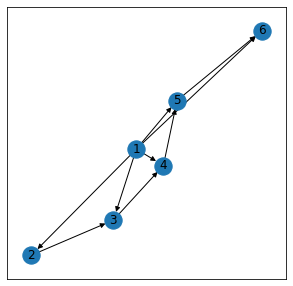

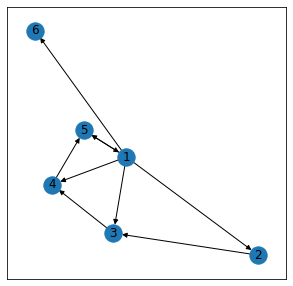

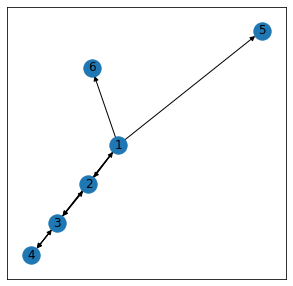

In [6]:
import matplotlib.pyplot as plt

for i in range(1,4):
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
    G=nx.DiGraph()
    G.add_edges_from(links) 
    hubs, authorities = nx.hits(G,  normalized = True) 
    
    print('Original hub score of node 1 in Graph '+str(i)+': ',hubs[1])

    for j in range(2,7):
        links.append((1,j))
    G=nx.DiGraph()
    G.add_edges_from(links) 
    hubs, authorities = nx.hits(G,  normalized = True) 
    print('Revised hub score of node 1 in Graph '+str(i)+': ',hubs[1])
    
    plt.figure(figsize =(5, 5)) 
    nx.draw_networkx(G, with_labels = True) 



## Increase authority

Original authority score of node 1 in Graph 1:  0.0
Revised authority score of node 1 in Graph 1:  0.5469181604499943
Original authority score of node 1 in Graph 2:  0.2
Revised authority score of node 1 in Graph 2:  0.6076252181097759
Original authority score of node 1 in Graph 3:  0.190983005521049
Revised authority score of node 1 in Graph 3:  0.5080994130554183


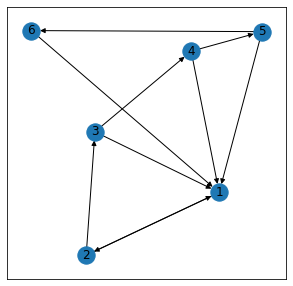

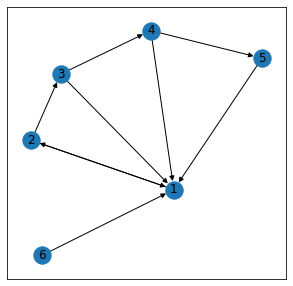

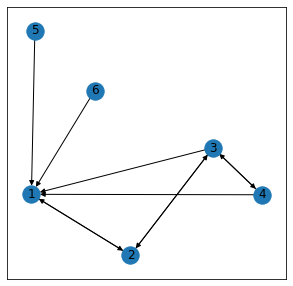

In [7]:
for i in range(1,4):
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
    G=nx.DiGraph()
    G.add_edges_from(links) 
    hubs, authorities = nx.hits(G,  normalized = True) 
    
    print('Original authority score of node 1 in Graph '+str(i)+': ',authorities[1])

    for j in range(2,7):
        links.append((j,1))
    G=nx.DiGraph()
    G.add_edges_from(links) 
    hubs, authorities = nx.hits(G,  normalized = True) 
    print('Revised authority score of node 1 in Graph '+str(i)+': ',authorities[1])
    
    plt.figure(figsize =(5, 5)) 
    nx.draw_networkx(G, with_labels = True) 

## PageRank
建設你自己網站的外部鏈結時，應盡可能找那些PR值高且外部鏈結數又少 的網站

Original pagerank score of node 1 in Graph 1:  0.14595957523600261
Revised pagerank score of node 1 in Graph 1:  0.18871963248697915
Original pagerank score of node 1 in Graph 2:  0.2
Revised pagerank score of node 1 in Graph 2:  0.2313486478027344
Original pagerank score of node 1 in Graph 3:  0.23255809814453124
Revised pagerank score of node 1 in Graph 3:  0.245500529296875


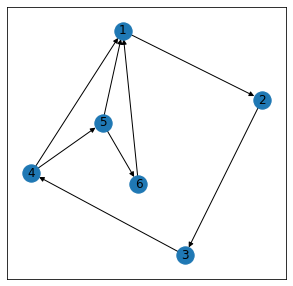

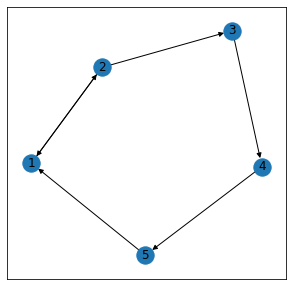

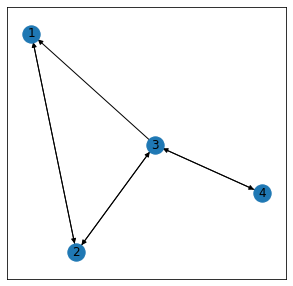

In [8]:
for i in range(1,4):
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
    G=nx.DiGraph()
    G.add_edges_from(links) 
    pr = nx.pagerank(G, alpha=0.15)
    
    print('Original pagerank score of node 1 in Graph '+str(i)+': ',pr[1])
    
    sorted_pr = sorted(pr.items(), key=lambda d: d[1],reverse=True)
    size = int(len(sorted_pr)/2)
    sorted_pr = sorted_pr[:size]
    
    for k,v in sorted_pr:
        links.append((k,1))
    
    G=nx.DiGraph()
    G.add_edges_from(links) 
    pr = nx.pagerank(G, alpha=0.15)
    print('Revised pagerank score of node 1 in Graph '+str(i)+': ',pr[1])
    
    plt.figure(figsize =(5, 5)) 
    nx.draw_networkx(G, with_labels = True) 

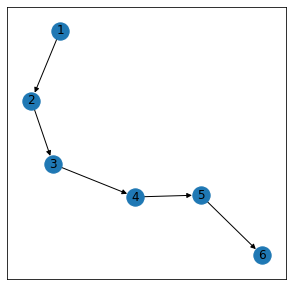

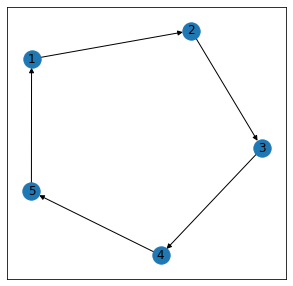

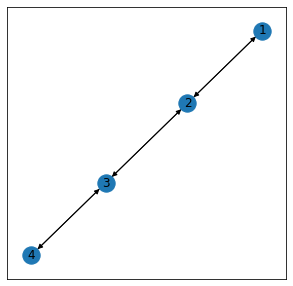

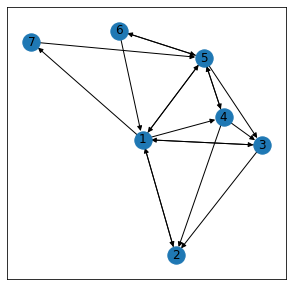

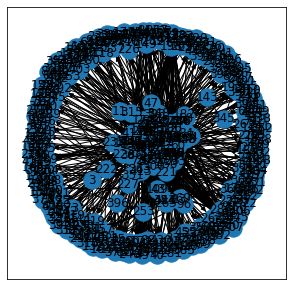

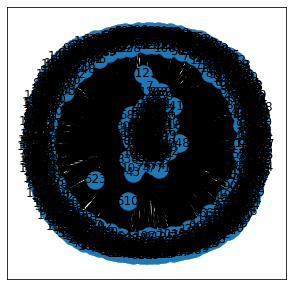

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

for i in range(1,7):
    links = []
    with open('project3dataset/graph_' + str(i) +'.txt', 'r') as f:
        for line in f.readlines():
            link = eval('('+line.strip()+')')
            links.append(link)
    G=nx.DiGraph()
    G.add_edges_from(links) 
    plt.figure(figsize =(5, 5)) 
    nx.draw_networkx(G, with_labels = True) 

In [18]:
links = []
with open('project3dataset/graph_5.txt', 'r') as f:
    for line in f.readlines():
        link = eval('('+line.strip()+')')
        links.append(link)
            
G=nx.DiGraph()
G.add_edges_from(links) 
try:
    hubs, authorities = nx.hits(G,  normalized = True) 
    pr = nx.pagerank(G, alpha=0.15)
except:
    print("Unexpected error:", sys.exc_info()[0])

key = 47
print("Graph 5:")
print("Hub Scores: ", hubs[key]) 
print("-"*100)
print("Authority Scores: ", authorities[key]) 
print("-"*100)
print("PageRank value: ", pr[key])
print("="*100)
    #plt.figure(figsize =(5, 5)) 
    #nx.draw_networkx(G, with_labels = True) 

Graph 5:
Hub Scores:  1.628416694292616e-24
----------------------------------------------------------------------------------------------------
Authority Scores:  7.142831726623142e-24
----------------------------------------------------------------------------------------------------
PageRank value:  0.002151900388810364


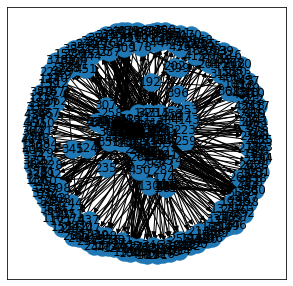

In [20]:
links = []
with open('project3dataset/data.txt', 'r') as f:
    for line in f.readlines():
        link = eval(','.join(line.strip().split(' ')))
        links.append(link)
G.add_edges_from(links) 
  
plt.figure(figsize =(5, 5)) 
nx.draw_networkx(G, with_labels = True) 